## Python for Data Analysis: Mobile User Behavior

This project is a part of a daily Python exercise series designed to build data analysis skills. The dataset used in this project focuses on mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics like app usage time, screen-on time, battery consumption, and mobile data usage.

<div style="text-align: center;">
  <img src="Mobile_User_Behavior.jpeg" alt="AI generated" width="300"/>
</div>


### Day 1 Loading and Reviewing Data

**Goal:** Understand the structure of the dataset and get familiar with basic DataFrame operation

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# import data from CSV file and save it as a DataFrame using the Pandas library
df = pd.read_csv("user_behavior_dataset.csv")

In [37]:
# head gives us top 5 rows from dataset
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [38]:
# tail gives us last 5 rows from dataset
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Based on DataFrame info function we can see that in the dataset there is no null values and my dataset contains 700 rows. I've got 7 columns with int64 data type 2 column oblect type and 1 column float64

In [40]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


The median values are relatively close to the mean for most variables, indicating that the data may not be highly skewed.

Users with higher screen-on times likely contribute to hiher battery drain and data usage.

There's significant variability in terms of app usage, screen-on time, battery drain and data usage. This implies different types of users in terms of mobile behaviior, rating from light users to power users.

### Day 2 Data Cleaning

**Goal:** Ensure the data is ready for analysis.

In [41]:
# Step1 lets finde out if there is some duplicate values in User ID column

duplicates = df[df.duplicated(subset=['User ID'])]

print(duplicates)

Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []


**Distribution of of categorical variables**

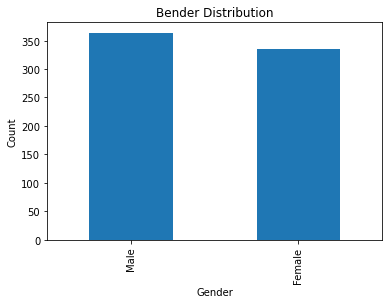

In [42]:
# Gender distribution

gender_distribution = df['Gender'].value_counts()

gender_distribution.plot(kind='bar')
plt.title('Bender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

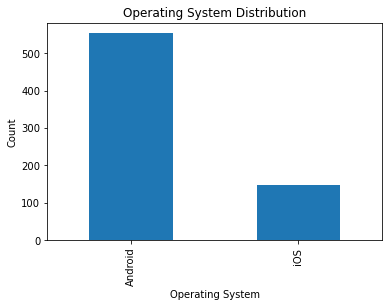

In [43]:
# Operating System distribution

os_distribution = df['Operating System'].value_counts()

os_distribution.plot(kind='bar')
plt.title('Operating System Distribution')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

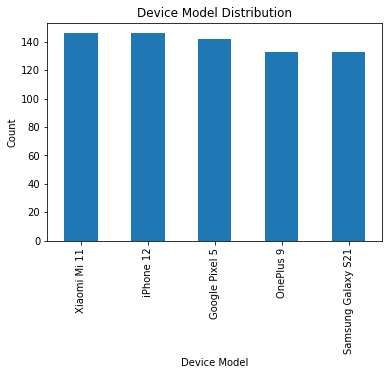

In [44]:
# Device Model distribution

dm_distribution = df['Device Model'].value_counts()

dm_distribution.plot(kind='bar')
plt.title('Device Model Distribution')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.show()